In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
## carregar imagem, converter para escala de cinza e normalizar
def process_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.rgb_to_grayscale(image)
    image = tf.cast(image, tf.float32) / 255.0
    return image

In [98]:
## Caminhos das imagens
image1_path = "/content/drive/MyDrive/Colab Notebooks/1_input/image1.jpg" ## Modifique a ordem e misture as imagens para testar o script
image2_path = "/content/drive/MyDrive/Colab Notebooks/1_input/image2.jpg" ## Modifique a ordem e misture as imagens para testar o script
image3_path = "/content/drive/MyDrive/Colab Notebooks/1_input/image3.jpg" ## Modifique a ordem e misture as imagens para testar o script

## Processar as imagens
image1 = process_image(image1_path)
image2 = process_image(image2_path)
image3 = process_image(image3_path)

## Vai comparar os arrays das imagens
similarity_1_2 = np.array_equal(image1, image2)
similarity_2_3 = np.array_equal(image2, image3)
similarity_3_1 = np.array_equal(image3, image1)

## Calcular o meio dos vetores dos indicadores
valor_indicador_meio_1 = image1.numpy().flatten()[len(image1.numpy().flatten()) // 2]
valor_indicador_meio_2 = image2.numpy().flatten()[len(image2.numpy().flatten()) // 2]
valor_indicador_meio_3 = image3.numpy().flatten()[len(image3.numpy().flatten()) // 2]

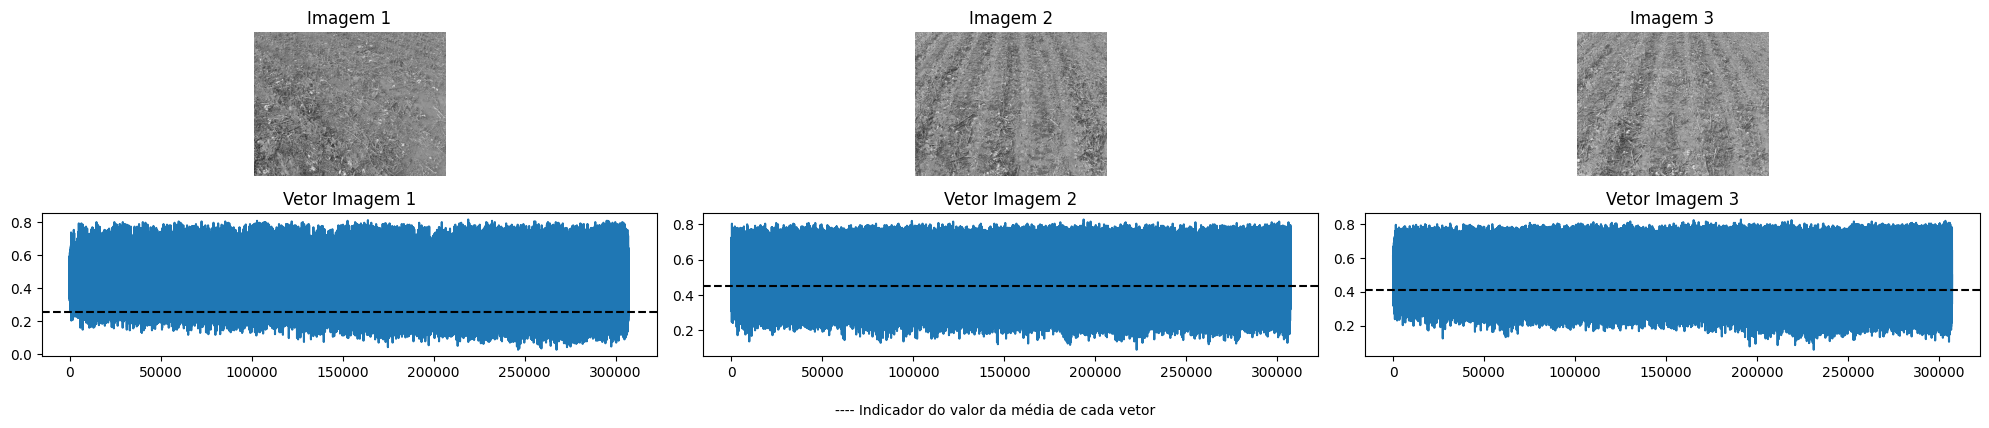


O valor do indicador da média do vetor da Imagem 1 é: 0.25490198
O valor do indicador da média do vetor da Imagem 2 é: 0.4509804
O valor do indicador da média do vetor da Imagem 3 é: 0.4117647

A imagem 1 é diferente da imagem 2;
A imagem 2 é diferente da imagem 3;
A imagem 3 é diferente da imagem 1.


In [99]:
## Configuração do layout
plt.figure(figsize=(20, 4))

plt.subplot(231)
plt.imshow(image1, cmap='gray')
plt.title('Imagem 1')
plt.axis('off')

plt.subplot(232)
plt.imshow(image2, cmap='gray')
plt.title('Imagem 2')
plt.axis('off')

plt.subplot(233)
plt.imshow(tf.reshape(image3, [480, 640]).numpy(), cmap='gray')
plt.title('Imagem 3')
plt.axis('off')

## Converte os Tensor para Vetores "Flatten" e adiciona subplots para mostrar os valores
plt.subplot(234)
plt.plot(image1.numpy().flatten())
plt.axhline(y=valor_indicador_meio_1, color='black', linestyle='--')  ## Adiciona a linha média do vetor
plt.title('Vetor Imagem 1')

plt.subplot(235)
plt.plot(image2.numpy().flatten())
plt.axhline(y=valor_indicador_meio_2, color='black', linestyle='--')
plt.title('Vetor Imagem 2')

plt.subplot(236)
plt.plot(image3.numpy().flatten())
plt.axhline(y=valor_indicador_meio_3, color='black', linestyle='--')
plt.title('Vetor Imagem 3')

## Adicionar legenda horizontal
plt.figtext(0.5, -0.05, '---- Indicador do valor da média de cada vetor', ha='center', fontsize=10)

## ajustar automaticamente o espaçamento
plt.tight_layout()
plt.show()

## Imprimir os valores dos indicadores do meio
print()
print("O valor do indicador da média do vetor da Imagem 1 é:", valor_indicador_meio_1)
print("O valor do indicador da média do vetor da Imagem 2 é:", valor_indicador_meio_2)
print("O valor do indicador da média do vetor da Imagem 3 é:", valor_indicador_meio_3)
print()

## Verificar a semelhança
if not similarity_1_2:
    print("A imagem 1 é diferente da imagem 2;")
else:
    print("A imagem 1 é semelhante à imagem 2;")

if not similarity_2_3:
    print("A imagem 2 é diferente da imagem 3;")
else:
    print("A imagem 2 é semelhante à imagem 3;")

if not similarity_3_1:
    print("A imagem 3 é diferente da imagem 1.")
else:
    print("A imagem 3 é semelhante à imagem 1.")